# Business Problem:

One of the leading telecom companies would like to define marketing strategy by analyzing their customer’s behavior. The company provided sample data set which summarizes the behaviors of active customers of a mobile network operator.

## EXPECTATIONS:

*	Identification of the relationships/ affinities between services.<br>
*	Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioural segments of credit card holders<br>
*	Identify cluster characterisitics of the cluster using detailed profiling.<br>
*	Provide the strategic insights and implementation of strategies for given set of cluster characteristics<br>

## DATA AVAILABLE:

*	Telco Data.csv

Region: Geographic indicator Tenure: Months with service Age: Age in years 

Marital: Marital status

Address: Years at current address Income: Household income in thousands Ed: Level of education

Employ: Years with current employer Retire: Retired

Gender: Gender

Reside: Number of people in household

Tollfree: Toll free service (1 - Using, 0- Not Using) Equip: Equipment rental (1 - Using, 0- Not Using) Callcard: Calling card service (1 - Using, 0- Not Using) Wireless: Wireless service (1 - Using, 0- Not Using) Longmon: Long distance last month Usage

Tollmon: Toll free last month Usage Equipmon: Equipment last month Usage Cardmon: Calling card last month Usage Wiremon: Wireless last month Usage

Multline: Multiple lines (1 - Using, 0- Not Using) Voice: Voice mail (1 - Using, 0- Not Using) Pager: Paging service (1 - Using, 0- Not Using) Internet: Internet (1 - Using, 0- Not Using) Callid: Caller ID (1 - Using, 0- Not Using) Callwait: Call waiting (1 - Using, 0- Not Using)

Forward: Call forwarding (1 - Using, 0- Not Using) Confer: 3-way calling (1 - Using, 0- Not Using) Ebill: Electronic billing (1 - Using, 0- Not Using) Custcat: Customer category


# Import the necessary libraries

In [117]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score

In [6]:
pd.set_option('mode.chained_assignment', None) # Avoid warnings

# Import the Dataset

In [29]:
df = pd.read_csv('telco_csv.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,...,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [9]:
df.shape

(1000, 30)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   int64  
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   int64  
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   int64  
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   int64  
 9   gender    1000 non-null   int64  
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   int64  
 12  equip     1000 non-null   int64  
 13  callcard  1000 non-null   int64  
 14  wireless  1000 non-null   int64  
 15  multline  1000 non-null   int64  
 16  voice     1000 non-null   int64  
 17  pager     1000 non-null   int64  
 18  internet  1000 non-null   int64  
 19  callid    1000 non-null   int64  
 20  callwait  1000 non-null   int64

In [13]:
# Missing values
df.isnull().sum()

region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
employ      0
retire      0
gender      0
reside      0
tollfree    0
equip       0
callcard    0
wireless    0
multline    0
voice       0
pager       0
internet    0
callid      0
callwait    0
forward     0
confer      0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
ebill       0
custcat     0
dtype: int64

# Data Audit

In [22]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,...,0.485000,0.493000,0.502000,11.723100,13.274000,14.219800,13.781000,11.583900,0.371000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,...,0.500025,0.500201,0.500246,10.363486,16.902122,19.068539,14.084496,19.719426,0.483314,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,8.525000,0.000000,0.000000,12.000000,0.000000,0.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,14.412500,24.250000,31.475000,20.500000,24.712500,1.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,99.950000,173.000000,77.700000,109.250000,111.950000,1.000000,4.000000


# Data Manipulation

## Handling Outliers

In [30]:
def outlier(x):
    x = x.clip(upper= x.quantile(0.99))
    x = x.clip(lower= x.quantile(0.01))
    return x

In [31]:
df = df.apply(outlier)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44.0,1,9,64.0,4,5.0,0,0,...,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33.0,1,7,136.0,5,5.0,0,0,...,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52.0,1,24,116.0,1,29.0,0,1,...,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33.0,0,12,33.0,2,0.0,0,1,...,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30.0,1,9,30.0,1,2.0,0,0,...,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


# One hot encoding

In [42]:
for i in df.columns:
    print('The column name : ',i)
    print(df[i].value_counts())

The column name :  region
3    344
2    334
1    322
Name: region, dtype: int64
The column name :  tenure
72    31
3     20
24    20
48    20
13    19
      ..
47     7
2      7
36     7
21     6
63     6
Name: tenure, Length: 72, dtype: int64
The column name :  age
33.00    39
39.00    35
35.00    34
34.00    32
31.00    32
37.00    31
40.00    28
42.00    28
30.00    26
36.00    25
52.00    25
27.00    24
45.00    24
43.00    24
48.00    24
46.00    24
54.00    24
41.00    24
25.00    23
51.00    23
50.00    23
28.00    22
47.00    21
55.00    21
32.00    21
26.00    21
38.00    21
57.00    20
24.00    20
44.00    20
29.00    19
53.00    19
49.00    18
23.00    16
20.00    15
22.00    15
59.00    14
63.00    12
56.00    11
60.00    11
61.00    11
58.00    10
64.00    10
70.01    10
62.00     9
21.00     8
66.00     7
68.00     6
69.00     6
65.00     6
67.00     5
70.00     3
Name: age, dtype: int64
The column name :  marital
0    505
1    495
Name: marital, dtype: int64
The column n

> So we know that, for region and custcat we need to do one ht encoding, others not required

In [44]:
df1 = pd.get_dummies(df, columns = ['region', 'custcat'], drop_first = True)

In [45]:
df1.tail()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,tollmon,equipmon,cardmon,wiremon,ebill,region_2,region_3,custcat_2,custcat_3,custcat_4
995,10,39.0,0,0,27.00,3,0.0,0,1,3,...,0.0,29.05,0.00,0.0,1,0,1,0,0,0
996,7,34.0,0,2,22.00,5,5.0,0,1,1,...,0.0,25.60,0.00,0.0,0,0,0,0,0,0
997,67,59.0,0,40,460.48,5,33.0,0,1,1,...,32.0,54.55,35.75,65.8,1,0,1,0,0,1
998,70,49.0,0,18,87.00,2,22.0,0,1,1,...,33.5,0.00,25.25,0.0,0,0,1,0,1,0
999,50,36.0,1,7,39.00,3,3.0,0,1,3,...,0.0,33.60,16.25,0.0,1,0,1,1,0,0


# Visualization (EDA)

# Correlation Analysis

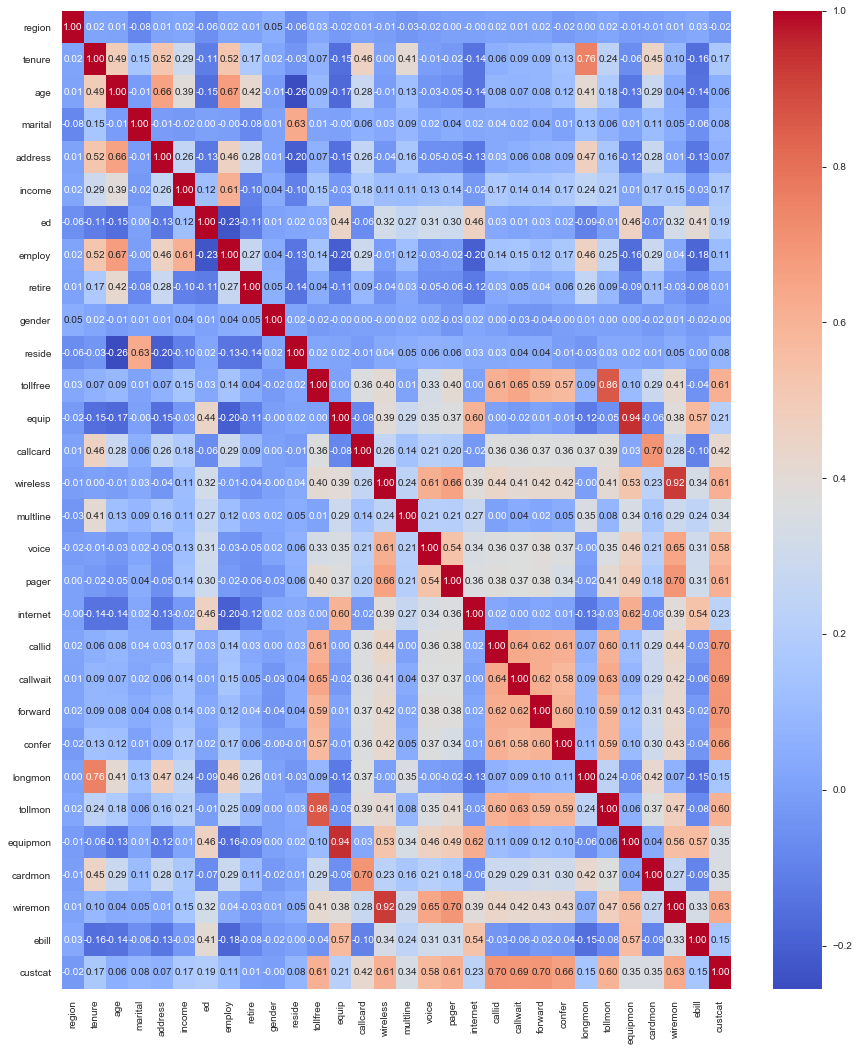

In [53]:
plt.figure(figsize=(15,18))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

# Feature Reduction
## PCA (principal component analysis)

> For doing PCA, first we need to standarise the data

In [54]:
sc= StandardScaler()
df_scaled = sc.fit_transform(df1)

In [56]:
df_scaled = pd.DataFrame(df_scaled, columns = df1.columns)
df_scaled.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,tollmon,equipmon,cardmon,wiremon,ebill,region_2,region_3,custcat_2,custcat_3,custcat_4
0,-1.055125,0.189446,1.010051,-0.252674,-0.126231,1.087753,-0.597197,-0.222076,-1.034598,-0.229045,...,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001,1.412095,-0.724148,-0.52644,-0.625156,-0.555788
1,-1.148806,-0.695476,1.010051,-0.453208,0.802534,1.906227,-0.597197,-0.222076,-1.034598,2.607427,...,0.484856,-0.749071,0.121006,1.275872,-0.768001,-0.708168,1.380933,-0.52644,-0.625156,1.799247
2,1.521092,0.833025,1.010051,1.251336,0.544543,-1.367671,1.811218,-0.222076,0.966559,-0.229045,...,0.311301,-0.749071,1.240918,-0.598794,-0.768001,-0.708168,1.380933,-0.52644,1.599600,-0.555788
3,-0.118319,-0.695476,-0.990050,0.048128,-0.526115,-0.549196,-1.098950,-0.222076,0.966559,-0.938163,...,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001,1.412095,-0.724148,-0.52644,-0.625156,-0.555788
4,-0.586722,-0.936819,1.010051,-0.252674,-0.564814,-1.367671,-0.898249,-0.222076,-1.034598,1.189191,...,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001,1.412095,-0.724148,-0.52644,1.599600,-0.555788


# Finding PCA n components

In [58]:
pca_model = PCA(n_components = 33)
pca_model.fit(df_scaled)

PCA(n_components=33)

In [61]:
pca_model.explained_variance_

array([7.37594377, 5.3818386 , 3.40079648, 1.84413613, 1.53395795,
       1.24065502, 1.18417401, 1.07621638, 1.00474643, 0.88746091,
       0.69579606, 0.64912595, 0.62999801, 0.59740224, 0.5328508 ,
       0.49399359, 0.46546653, 0.45715771, 0.42521153, 0.4072122 ,
       0.3723491 , 0.35726153, 0.33375878, 0.30301828, 0.26756922,
       0.23446072, 0.21730833, 0.19970755, 0.18901051, 0.11533482,
       0.0680384 , 0.06405373, 0.02702175])

In [63]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.22328993, 0.38621287, 0.48916425, 0.54499128, 0.59142837,
       0.62898638, 0.66483456, 0.69741456, 0.72783098, 0.75469684,
       0.77576049, 0.7954113 , 0.81448306, 0.83256805, 0.8486989 ,
       0.86365343, 0.87774437, 0.89158378, 0.9044561 , 0.91678352,
       0.92805554, 0.93887082, 0.94897461, 0.9581478 , 0.96624785,
       0.97334562, 0.97992413, 0.98596983, 0.99169169, 0.99518319,
       0.9972429 , 0.99918198, 1.        ])

> Here We need select the components according to the total variance should be >75% and individual value should be greater than 0.8.
> Based on the above criteria, we got to know we need to choose 10 components

In [65]:
pca_model = PCA(n_components = 10)
pca_model.fit(df_scaled)

PCA(n_components=10)

In [66]:
pca_model.explained_variance_

array([7.37594377, 5.3818386 , 3.40079647, 1.84413473, 1.53395245,
       1.24062677, 1.18410958, 1.07618776, 1.00472091, 0.8874225 ])

# Dimension Reduction

In [74]:
reduced_component = pca_model.transform(df_scaled)
dimension = pd.DataFrame(reduced_component, columns = ['PC'+str(i) for i in range(1,11)])
dimension.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.266240,-0.088035,-0.980838,0.309523,1.511048,0.628081,0.405679,-0.956723,0.875750,-0.608438
1,3.456679,-0.773759,-2.418442,1.863927,-1.258639,2.198321,0.553917,-1.016360,0.564022,1.229132
2,0.306760,4.374568,0.098713,0.432127,-1.580472,0.650004,-0.412195,0.335424,-0.463774,-1.132742
3,-3.493635,-0.371592,-0.897146,-1.111116,1.541422,0.302045,0.677258,-0.305528,-1.322586,0.481278
4,-1.943230,0.746403,-2.963887,1.314729,1.621143,0.158339,-0.167347,0.670335,1.217539,-0.048354


# Factor Loading

> Factor loadinng = Eigen vector * sqrt(Eign values)

In [90]:
PCA_loadings = pd.DataFrame((pca_model.components_.T* np.sqrt(pca_model.explained_variance_)).T, columns = df1.columns).T
PCA_loadings

,0,1,2,3,4,5,6,7,8,9
tenure,0.201294,0.528304,0.627712,0.213198,-0.020310,-0.091077,-0.019409,-0.072402,-0.033088,0.046753
age,0.146484,0.562730,0.501499,-0.289778,0.033717,0.210194,0.102686,0.176647,0.169209,-0.063158
marital,0.072451,0.015133,0.052789,0.798102,-0.007117,0.300644,0.055214,0.240644,0.175003,-0.107570
address,0.116378,0.506053,0.501000,-0.178339,0.024677,0.063910,0.122400,0.120579,0.129783,-0.011057
income,0.269835,0.281988,0.309516,-0.185303,0.020753,0.525158,-0.536853,-0.150326,-0.006402,-0.071501
ed,0.276653,-0.521261,0.183831,-0.042611,-0.047660,-0.029496,-0.298197,0.071280,0.035935,0.023871
employ,0.182789,0.606793,0.431006,-0.178045,0.043584,0.363253,-0.155889,0.066956,0.042439,-0.055772
retire,0.030160,0.315709,0.206646,-0.246868,0.035362,-0.134456,0.525855,0.529136,0.073216,0.054836
gender,-0.007636,0.002950,0.049726,0.003392,-0.079237,0.130162,-0.036742,0.380634,-0.883917,-0.177181
reside,0.048307,-0.131617,-0.132101,0.813760,0.011572,0.266324,0.039013,0.191305,0.086056,-0.035252


In [ ]:
#PCA_loadings.to_csv('PCA_loadings.csv')

# Clustering

In [91]:
selected_vars = ['employ', 'tenure', 'multline', 'custcat_2', 'reside', 'region_3', 'region_2', 'income', 'retire']

In [94]:
df_scaled2 = df_scaled[selected_vars]
df_scaled2.head()

,employ,tenure,multline,custcat_2,reside,region_3,region_2,income,retire
0,-0.597197,-1.055125,-0.95119,-0.52644,-0.229045,-0.724148,1.412095,-0.126231,-0.222076
1,-0.597197,-1.148806,-0.95119,-0.52644,2.607427,1.380933,-0.708168,0.802534,-0.222076
2,1.811218,1.521092,-0.95119,-0.52644,-0.229045,1.380933,-0.708168,0.544543,-0.222076
3,-1.098950,-0.118319,-0.95119,-0.52644,-0.938163,-0.724148,1.412095,-0.526115,-0.222076
4,-0.898249,-0.586722,-0.95119,-0.52644,1.189191,-0.724148,1.412095,-0.564814,-0.222076


# Segmentation

In [100]:
km_3 = KMeans(n_clusters = 3, random_state = 12).fit(df_scaled2)
km_4 = KMeans(n_clusters = 4, random_state = 12).fit(df_scaled2)
km_5 = KMeans(n_clusters = 5, random_state = 12).fit(df_scaled2)
km_6 = KMeans(n_clusters = 6, random_state = 12).fit(df_scaled2)
km_7 = KMeans(n_clusters = 7, random_state = 12).fit(df_scaled2)
km_8 = KMeans(n_clusters = 8, random_state = 12).fit(df_scaled2)

In [104]:
km_3.labels_

array([0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0,
       0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 1,

In [106]:
km_3.cluster_centers_ # center points

array([[-0.4666178 , -0.46884172, -0.46722187, -0.52644013,  0.11123218,
         0.02793011, -0.0397837 , -0.3553055 , -0.15587636],
       [ 1.34192389,  0.90885222,  0.23613606, -0.37615748, -0.3357266 ,
        -0.03487356,  0.14556635,  1.04601222,  0.57239773],
       [-0.18145831,  0.30693606,  1.05131497,  1.89955124,  0.06088983,
        -0.0397373 , -0.05015518, -0.1651198 , -0.19880042]])

In [108]:
silhouette_score(df_scaled2, km_3.labels_)

0.22795008809347087

In [109]:
df1['cluster_3'] = km_3.labels_
df1['cluster_4'] = km_4.labels_
df1['cluster_5'] = km_5.labels_
df1['cluster_6'] = km_6.labels_
df1['cluster_7'] = km_7.labels_
df1['cluster_8'] = km_8.labels_

In [110]:
df1.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,region_3,custcat_2,custcat_3,custcat_4,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13,44.0,1,9,64.0,4,5.0,0,0,2,...,0,0,0,0,0,1,1,2,2,4
1,11,33.0,1,7,136.0,5,5.0,0,0,6,...,1,0,0,1,0,1,2,5,5,1
2,68,52.0,1,24,116.0,1,29.0,0,1,2,...,1,0,1,0,1,2,4,3,1,3
3,33,33.0,0,12,33.0,2,0.0,0,1,1,...,0,0,0,0,0,1,1,2,2,4
4,23,30.0,1,9,30.0,1,2.0,0,0,4,...,0,0,1,0,0,1,1,2,2,4


# choosing number of clusters using silhouette score

In [121]:
scores = []
k_range = range(3,9)
for i in k_range:
    k = KMeans(n_clusters = i, random_state = 12).fit(df_scaled2)
    scores.append(metrics.silhouette_score(df_scaled2, k.labels_))

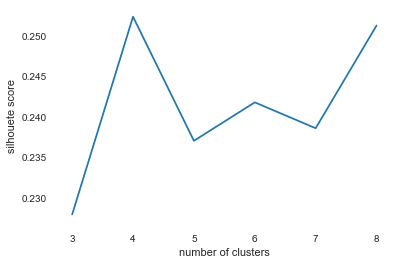

In [125]:
plt.plot(k_range, scores)
plt.xlabel('number of clusters')
plt.ylabel('silhouete score')
plt.show()

> We found that 4th cluster is giving high silhouette score

# segment Distribution

In [144]:
df1.cluster_4.value_counts()    # segment distributed 4-40% range

1    555
0    202
2    196
3     47
Name: cluster_4, dtype: int64

# segmentation Profiling

In [153]:
size = pd.concat([pd.Series(df1.cluster_3.size),
                  pd.Series(df1.cluster_3.value_counts().sort_index()),
                  pd.Series(df1.cluster_4.value_counts().sort_index()),
                  pd.Series(df1.cluster_5.value_counts().sort_index()),
                  pd.Series(df1.cluster_6.value_counts().sort_index()),
                  pd.Series(df1.cluster_7.value_counts().sort_index()),
                  pd.Series(df1.cluster_8.value_counts().sort_index())])

size

0    1000
0     571
1     226
2     203
0     202
1     555
2     196
3      47
0     202
1     382
2     222
3      47
4     147
0     203
1      47
2     220
3     104
4     202
5     224
0     204
1     130
2     205
3      59
4     174
5     181
6      47
0      62
1     171
2     127
3     113
4     165
5      47
6     174
7     141
dtype: int64

In [157]:
seg_size = pd.DataFrame(size, columns = ['seg_size'])
seg_pct = pd.DataFrame(size/df1.cluster_3.size, columns = ['seg_pct'])

# Profiling Output

In [171]:
Profiling_output = pd.concat([df1.mean().T,
                              df1.groupby('cluster_3').mean().T,
                              df1.groupby('cluster_4').mean().T,
                              df1.groupby('cluster_5').mean().T,
                              df1.groupby('cluster_6').mean().T,
                              df1.groupby('cluster_7').mean().T,
                              df1.groupby('cluster_8').mean().T
                              ], axis = 1)

In [179]:
Profiling_output_final = pd.concat([seg_size.T, seg_pct.T, Profiling_output], axis=0)

In [185]:
Profiling_output_final.columns = ['overall', 'km3_1', 'km3_2', 'km3_3',
                                   'kmk4_1', 'km4_2', 'km4_3', 'km4_4',
                                   'kmk5_1', 'km5_2', 'km5_3', 'km5_4', 'km5_5',
                                   'kmk6_1', 'km6_2', 'km6_3', 'km6_4', 'km6_5', 'km6_6',
                                   'kmk7_1', 'km7_2', 'km7_3', 'km7_4', 'km7_5', 'km7_6', 'km7_7',
                                   'kmk8_1', 'km8_2', 'km8_3', 'km8_4', 'km8_5', 'km8_6', 'km8_7', 'km8_8']

In [186]:
Profiling_output_final

,overall,km3_1,km3_2,km3_3,kmk4_1,km4_2,km4_3,km4_4,kmk5_1,km5_2,...,km7_6,km7_7,kmk8_1,km8_2,km8_3,km8_4,km8_5,km8_6,km8_7,km8_8
seg_size,1000.000000,571.000000,226.000000,203.000000,202.000000,555.000000,196.000000,47.000000,202.000000,382.000000,...,181.000000,47.000000,62.000000,171.000000,127.000000,113.000000,165.000000,47.000000,174.000000,141.000000
seg_pct,1.000000,0.571000,0.226000,0.203000,0.202000,0.555000,0.196000,0.047000,0.202000,0.382000,...,0.181000,0.047000,0.062000,0.171000,0.127000,0.113000,0.165000,0.047000,0.174000,0.141000
tenure,35.526000,25.516637,54.929204,42.078818,41.960396,25.520721,53.280612,51.978723,41.960396,26.782723,...,22.972376,51.978723,50.822581,21.590643,45.031496,55.566372,25.218182,51.978723,23.034483,43.070922
age,41.645100,37.150630,54.133097,40.384286,40.207921,36.670270,51.581684,65.129574,40.207921,37.065445,...,37.016630,65.129574,55.338710,36.812924,42.118110,46.247788,37.103030,65.129574,37.126437,40.432624
marital,0.495000,0.492119,0.455752,0.546798,0.544554,0.495495,0.484694,0.319149,0.544554,0.528796,...,0.403315,0.319149,0.419355,0.397661,0.582677,0.522124,0.400000,0.319149,0.591954,0.595745
address,11.520000,8.399299,19.013274,11.955665,11.816832,8.239640,17.464286,24.191489,11.816832,8.502618,...,8.370166,24.191489,17.887097,8.087719,12.204724,15.336283,9.193939,24.191489,7.965517,12.092199
income,73.785700,46.241576,154.875044,60.985222,60.787129,45.347748,176.386735,37.593617,60.787129,48.526178,...,45.900552,37.593617,309.480645,45.520468,66.622047,87.035398,53.575758,37.593617,52.339080,62.439716
ed,2.671000,2.642732,2.455752,2.990148,2.980198,2.643243,2.581633,2.042553,2.980198,2.685864,...,2.535912,2.042553,2.661290,2.497076,2.874016,2.743363,2.375758,2.042553,2.775862,3.070922
employ,10.951100,6.301226,24.323451,9.142857,9.198020,6.174775,23.342092,23.213830,9.198020,6.701571,...,6.773481,23.213830,29.887903,6.614035,11.125984,14.893805,7.793939,23.213830,6.683908,9.439716
retire,0.047000,0.014011,0.168142,0.004926,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [187]:
Profiling_output_final.to_csv('segmentation_profiling_report.csv')

> Based on the profiling report we can do further Analysis in the Excel sheet to show the clientb which segment is important and which to consider

# Predict the segments for new data

In [183]:
new_cust = pd.read_csv('Telco_new_cust.csv')
new_cust.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,1,38,55,1,12,135,2,24,0,0,...,1,1,1,12.15,31.75,0.00,16.25,0.00,1,4
1,3,59,26,1,3,41,4,1,0,1,...,0,0,0,12.65,0.00,35.10,46.75,29.15,0,2
2,2,54,55,0,1,587,3,33,0,0,...,1,1,1,13.00,0.00,0.00,0.00,0.00,0,3
3,3,9,40,0,13,38,4,7,0,1,...,1,1,1,3.35,21.00,42.40,17.50,59.55,1,4
4,1,67,67,1,38,49,2,10,0,1,...,0,0,0,14.30,0.00,29.25,25.25,0.00,1,2


In [184]:
new_cust.shape

(100, 30)

In [188]:
new_cust = pd.get_dummies(new_cust, columns = ['region', 'custcat'], drop_first=True)
new_cust

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,tollmon,equipmon,cardmon,wiremon,ebill,region_2,region_3,custcat_2,custcat_3,custcat_4
0,38,55,1,12,135,2,24,0,0,4,...,31.75,0.00,16.25,0.00,1,0,0,0,0,1
1,59,26,1,3,41,4,1,0,1,3,...,0.00,35.10,46.75,29.15,0,0,1,1,0,0
2,54,55,0,1,587,3,33,0,0,1,...,0.00,0.00,0.00,0.00,0,1,0,0,1,0
3,9,40,0,13,38,4,7,0,1,1,...,21.00,42.40,17.50,59.55,1,0,1,0,0,1
4,67,67,1,38,49,2,10,0,1,2,...,0.00,29.25,25.25,0.00,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,24,30,0,0,25,4,5,0,0,2,...,47.75,0.00,32.75,64.00,1,0,1,0,0,1
96,3,26,1,6,59,4,0,0,1,3,...,23.50,29.60,10.75,19.20,0,1,0,0,0,1
97,4,30,0,1,45,4,6,0,0,3,...,0.00,34.20,29.00,0.00,1,0,0,0,0,1
98,72,40,1,19,163,4,15,0,0,2,...,31.25,0.00,14.75,0.00,1,0,0,1,0,0


> What are the preprocessing steps we had done in model creation same should be reflecting the new customer data

# Standardise the data

In [191]:
new_cust_scaled = pd.DataFrame(sc.transform(new_cust), columns = new_cust.columns)
new_cust_scaled

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,tollmon,equipmon,cardmon,wiremon,ebill,region_2,region_3,custcat_2,custcat_3,custcat_4
0,0.115883,1.074368,1.010051,0.048128,0.789634,-0.549196,1.309465,-0.222076,-1.034598,1.189191,...,1.179075,-0.749071,0.195667,-0.598794,1.302082,-0.708168,-0.724148,-0.526440,-0.625156,1.799247
1,1.099530,-1.258609,1.010051,-0.854277,-0.422919,1.087753,-0.998599,-0.222076,0.966559,0.480073,...,-0.824695,1.106806,2.472821,0.931920,-0.768001,-0.708168,1.380933,1.899551,-0.625156,-0.555788
2,0.865328,1.074368,-0.990050,-1.054812,6.620209,0.269278,2.212621,-0.222076,-1.034598,-0.938163,...,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001,1.412095,-0.724148,-0.526440,1.599600,-0.555788
3,-1.242486,-0.132344,-0.990050,0.148396,-0.461618,1.087753,-0.396495,-0.222076,0.966559,-0.938163,...,0.500633,1.492785,0.288993,2.528274,1.302082,-0.708168,1.380933,-0.526440,-0.625156,1.799247
4,1.474252,2.039737,1.010051,2.655077,-0.319723,-0.549196,-0.095443,-0.222076,0.966559,-0.229045,...,-0.824695,0.797493,0.867614,-0.598794,1.302082,-0.708168,-0.724148,1.899551,-0.625156,-0.555788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.539882,-0.936819,-0.990050,-1.155079,-0.629311,1.087753,-0.597197,-0.222076,-1.034598,-0.229045,...,2.188850,-0.749071,1.427570,2.761951,1.302082,-0.708168,1.380933,-0.526440,-0.625156,1.799247
96,-1.523528,-1.258609,1.010051,-0.553475,-0.190728,1.087753,-1.098950,-0.222076,0.966559,0.480073,...,0.658411,0.815999,-0.214967,0.409429,-0.768001,1.412095,-0.724148,-0.526440,-0.625156,1.799247
97,-1.476688,-0.936819,-0.990050,-1.054812,-0.371321,1.087753,-0.496846,-0.222076,-1.034598,0.480073,...,-0.824695,1.059219,1.147592,-0.598794,1.302082,-0.708168,-0.724148,-0.526440,-0.625156,1.799247
98,1.708454,-0.132344,1.010051,0.749999,1.150820,1.087753,0.406310,-0.222076,-1.034598,-0.229045,...,1.147520,-0.749071,0.083676,-0.598794,1.302082,-0.708168,-0.724148,1.899551,-0.625156,-0.555788


In [193]:
new_cust_scaled2 = new_cust_scaled[selected_vars]
new_cust_scaled2.tail()

,employ,tenure,multline,custcat_2,reside,region_3,region_2,income,retire
95,-0.597197,-0.539882,-0.951190,-0.526440,-0.229045,1.380933,-0.708168,-0.629311,-0.222076
96,-1.098950,-1.523528,-0.951190,-0.526440,0.480073,-0.724148,1.412095,-0.190728,-0.222076
97,-0.496846,-1.476688,-0.951190,-0.526440,0.480073,-0.724148,-0.708168,-0.371321,-0.222076
98,0.406310,1.708454,1.051315,1.899551,-0.229045,-0.724148,-0.708168,1.150820,-0.222076
99,-0.496846,0.396925,1.051315,-0.526440,-0.938163,-0.724148,-0.708168,-0.139130,-0.222076


# Predict the segment

In [196]:
new_cust['pred_segment'] = km_4.predict(new_cust_scaled2)

In [197]:
new_cust.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,equipmon,cardmon,wiremon,ebill,region_2,region_3,custcat_2,custcat_3,custcat_4,pred_segment
0,38,55,1,12,135,2,24,0,0,4,...,0.00,16.25,0.00,1,0,0,0,0,1,2
1,59,26,1,3,41,4,1,0,1,3,...,35.10,46.75,29.15,0,0,1,1,0,0,0
2,54,55,0,1,587,3,33,0,0,1,...,0.00,0.00,0.00,0,1,0,0,1,0,2
3,9,40,0,13,38,4,7,0,1,1,...,42.40,17.50,59.55,1,0,1,0,0,1,1
4,67,67,1,38,49,2,10,0,1,2,...,29.25,25.25,0.00,1,0,0,1,0,0,0
